# **Analysis of CitiBikeNYC Big Data**

---
### **Task**
Alta Bicycle Share, the company that owns and operates the Citi Bike program, is facing some unexpected financial difficulties as a result of dropping sponsorship revenue for the bike share program. Faced with a revenue shortfall, Alta would like you to mine the Citi Bike stations and trips data to come up with solutions and projected revenue impact, or alternatively investigate ways to reduce expenses such as the number of operating stations, without impacting ride volume too negatively.


## **Installations and Import of Necessary Packages**

In [ ]:
!pip install --upgrade google-cloud-bigquery
!pip install -e git+https://github.com/SohierDane/BigQuery_Helper#egg=bq_helper

     |████████████████████████████████| 198 kB 5.9 MB/s 
     |████████████████████████████████| 92 kB 403 kB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.26.3
    Uninstalling google-api-core-1.26.3:
      Successfully uninstalled google-api-core-1.26.3
  Attempting uninstall: google-resumable-media
    Found existing installation: google-resumable-media 0.4.1
    Uninstalling google-resumable-media-0.4.1:
      Successfully uninstalled google-resumable-media-0.4.1
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 1.0.3
    Uninstalling google-cloud-core-1.0.3:
      Successfully uninstalled google-cloud-core-1.0.3
  Attempting uninstall: google-cloud-bigquery
    Found existing installation: google-cloud-bigquery 1.21.0
    Uninstalling google-cloud-bigquery-1.21.0:
      Successfull

Obtaining bq_helper from git+https://github.com/SohierDane/BigQuery_Helper#egg=bq_helper
  Cloning https://github.com/SohierDane/BigQuery_Helper to ./src/bq-helper
  Running command git clone -q https://github.com/SohierDane/BigQuery_Helper /content/src/bq-helper
  Running setup.py develop for bq-helper


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/Colab Notebooks/31ceb9b371d6.json"

#ensure the path is set correctly
!echo $GOOGLE_APPLICATION_CREDENTIALS

/content/gdrive/My Drive/Colab Notebooks/31ceb9b371d6.json


In [ ]:
import bq_helper
from bq_helper import BigQueryHelper
nyc = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="new_york_citibike")

In [ ]:
bq_assistant = BigQueryHelper("bigquery-public-data", "new_york_citibike")
bq_assistant.list_tables()

['citibike_stations', 'citibike_trips']

## **General Bike Trips and Exploratory Analysis**

**CitiBike Trips Table Info**

In [ ]:
bq_assistant.table_schema("citibike_trips")

,name,type,mode,description
0,tripduration,INTEGER,NULLABLE,Trip Duration (in seconds)
1,starttime,DATETIME,NULLABLE,"Start Time, in NYC local time."
2,stoptime,DATETIME,NULLABLE,"Stop Time, in NYC local time."
3,start_station_id,INTEGER,NULLABLE,Start Station ID
4,start_station_name,STRING,NULLABLE,Start Station Name
5,start_station_latitude,FLOAT,NULLABLE,Start Station Latitude
6,start_station_longitude,FLOAT,NULLABLE,Start Station Longitude
7,end_station_id,INTEGER,NULLABLE,End Station ID
8,end_station_name,STRING,NULLABLE,End Station Name
9,end_station_latitude,FLOAT,NULLABLE,End Station Latitude


**CitiBike Stations Table Info**

In [ ]:
bq_assistant.table_schema("citibike_stations")

,name,type,mode,description
0,station_id,INTEGER,REQUIRED,Unique identifier of a station.
1,name,STRING,NULLABLE,Public name of the station.
2,short_name,STRING,NULLABLE,"Short name or other type of identifier, as use..."
3,latitude,FLOAT,NULLABLE,The latitude of station. The field value must ...
4,longitude,FLOAT,NULLABLE,The longitude of station. The field value must...
5,region_id,INTEGER,NULLABLE,ID of the region where station is located.
6,rental_methods,STRING,NULLABLE,Array of enumerables containing the payment me...
7,capacity,INTEGER,NULLABLE,ANumber of total docking points installed at t...
8,eightd_has_key_dispenser,BOOLEAN,NULLABLE,
9,num_bikes_available,INTEGER,NULLABLE,Number of bikes available for rental.


**CitiBike Trips dataset between January 2016 and December 2017**

In [ ]:
query = """SELECT *
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE 
    starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
LIMIT 1000;
        """
data_2016_2017 = nyc.query_to_pandas(query)
data_2016_2017.head(10)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
0,799,2017-09-02 16:27:37,2017-09-02 16:40:57,335,Washington Pl & Broadway,40.729039,-73.994046,540,Lexington Ave & E 29 St,40.743116,-73.982154,28833,Subscriber,1997,male,
1,238,2017-11-15 06:57:09,2017-11-15 07:01:08,146,Hudson St & Reade St,40.716250,-74.009106,387,Centre St & Chambers St,40.712733,-74.004607,21338,Subscriber,1998,female,
2,474,2017-10-06 12:17:06,2017-10-06 12:25:00,470,W 20 St & 8 Ave,40.743453,-74.000040,496,E 16 St & 5 Ave,40.737262,-73.992390,14823,Subscriber,1996,male,
3,1122,2017-08-16 07:40:27,2017-08-16 07:59:10,3260,Mercer St & Bleecker St,40.727064,-73.996621,518,E 39 St & 2 Ave,40.747804,-73.973442,27590,Subscriber,1947,male,
4,318,2017-09-22 06:44:27,2017-09-22 06:49:45,3255,8 Ave & W 31 St,40.750585,-73.994685,458,11 Ave & W 27 St,40.751396,-74.005226,15929,Subscriber,1997,male,
5,504,2017-10-30 14:42:18,2017-10-30 14:50:42,3233,E 48 St & 5 Ave,40.757246,-73.978059,454,E 51 St & 1 Ave,40.754557,-73.965930,17682,Subscriber,1948,male,
6,337,2017-06-22 10:03:45,2017-06-22 10:09:22,3297,6 St & 7 Ave,40.668663,-73.979881,3416,7 Ave & Park Pl,40.677615,-73.973243,18221,Subscriber,1999,male,
7,496,2016-05-04 05:52:47,2016-05-04 06:01:04,477,W 41 St & 8 Ave,40.756405,-73.990026,469,Broadway & W 53 St,40.763441,-73.982681,18731,Subscriber,1941,male,
8,696,2016-09-29 18:17:16,2016-09-29 18:28:52,247,Perry St & Bleecker St,40.735354,-74.004831,494,W 26 St & 8 Ave,40.747348,-73.997236,26450,Subscriber,1952,male,
9,1078,2017-12-09 09:55:27,2017-12-09 10:13:25,323,Lawrence St & Willoughby St,40.692362,-73.986317,242,Carlton Ave & Flushing Ave,40.697787,-73.973736,33235,Subscriber,1950,male,


**Size of the dataset from 2016-2017**

---

Query to get the total number of trips made between the year 2016 and 2017. From the result we can deduce that the size of our data or the total number of trips made is 8,979,247.

In [ ]:
query = """SELECT min(starttime) Earliest_Trip, max(stoptime) Latest_Trip, COUNT(*) Total_Trips
FROM `bigquery-public-data.new_york.citibike_trips`
WHERE start_station_id IS NOT NULL
  AND birth_year IS NOT NULL
  AND end_station_longitude != 0
  AND starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
LIMIT 1000;
        """
response = nyc.query_to_pandas(query)
response.head(10)

,Earliest_Trip,Latest_Trip,Total_Trips
0,2016-01-01 00:00:41+00:00,2016-10-02 00:07:12+00:00,8979247


**Generations Trips Trend**

---
From the result of the data, we realize that Millennials (Age group 25 – 40) biked more than other generations. And their biking trends increased in 2017 than in 2016.


In [ ]:
query = """SELECT
  EXTRACT(year
  FROM
    starttime) AS year,
  COUNT(CASE
      WHEN birth_year>= 1946 AND birth_year < 1964 THEN 1
  END
    ) AS Boomer,
  COUNT(CASE
      WHEN birth_year>= 1965 AND birth_year < 1980 THEN 1
  END
    ) AS Gen_X,
  COUNT(CASE
      WHEN birth_year>= 1981 AND birth_year < 1996 THEN 1
  END
    ) AS Millennials,
  COUNT(CASE
      WHEN birth_year>= 1997 AND birth_year < 2012 THEN 1
  END
    ) AS Gen_Z
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE 
    starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
GROUP BY
  year
HAVING 
  year is NOT NULL
ORDER BY
  year DESC;
        """
age_group = nyc.query_to_pandas(query)
age_group

,year,Boomer,Gen_X,Millennials,Gen_Z
0,2017,1499071,3657987,6544314,207327
1,2016,1234084,2832495,4339076,62687


In [ ]:
df = pd.melt(age_group, id_vars="year", var_name="generation", value_name="count")
df

,year,generation,count
0,2017,Boomer,1499071
1,2016,Boomer,1234084
2,2017,Gen_X,3657987
3,2016,Gen_X,2832495
4,2017,Millennials,6544314
5,2016,Millennials,4339076
6,2017,Gen_Z,207327
7,2016,Gen_Z,62687


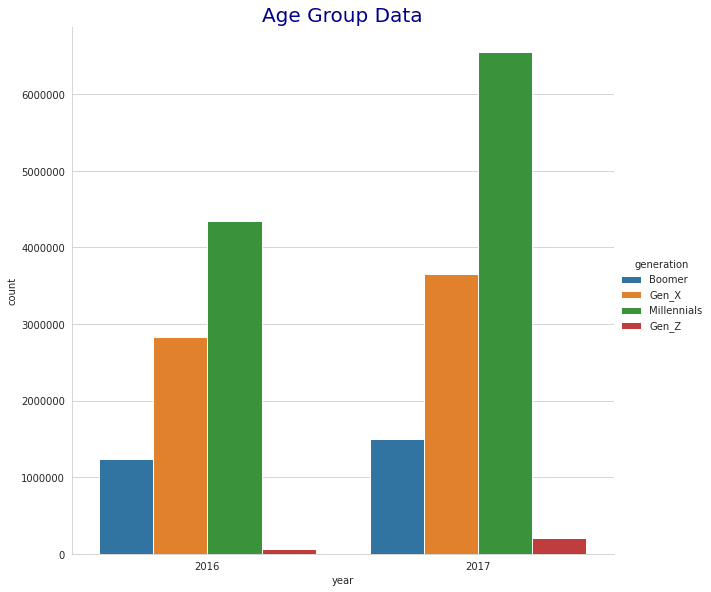

In [ ]:
sns.set_style('whitegrid')
sns.catplot(x='year', y='count', hue='generation', data=df, kind='bar',size=8)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('Age Group Data', fontsize=20, color='DarkBlue', fontname='Console')
plt.show()

**Gender Trip Duration**

---
There was a significant increase in the duration of both the male and the female gender from 2016-2017. But the female gender had more hours of bike trip than the male gender


In [ ]:
query = """SELECT
  EXTRACT(year
  FROM
    starttime) AS year,
  SUM(CASE
      WHEN gender='female' THEN tripduration
  END
    )/60*60 AS Male_ride_time,
  SUM(CASE
      WHEN gender='male' THEN tripduration
  END
    )/60*60 AS Female_ride_time
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE 
    starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
GROUP BY
  year
HAVING 
  year is NOT NULL
ORDER BY
  year DESC;
        """
gender_group = nyc.query_to_pandas(query)
gender_group

,year,Male_ride_time,Female_ride_time
0,2017,3.309450e+09,8.149148e+09
1,2016,2.063674e+09,5.397053e+09


In [ ]:
df2= pd.melt(gender_group,id_vars='year',var_name='gender',value_name='count')
print(df2)

   year            gender         count
0  2017    Male_ride_time  3.309450e+09
1  2016    Male_ride_time  2.063674e+09
2  2017  Female_ride_time  8.149148e+09
3  2016  Female_ride_time  5.397053e+09


In [ ]:
df2['count']= df2['count'].astype('int64')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    4 non-null      int64 
 1   gender  4 non-null      object
 2   count   4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [ ]:
print(df2)

   year            gender       count
0  2017    Male_ride_time  3309449697
1  2016    Male_ride_time  2063673796
2  2017  Female_ride_time  8149148233
3  2016  Female_ride_time  5397053292


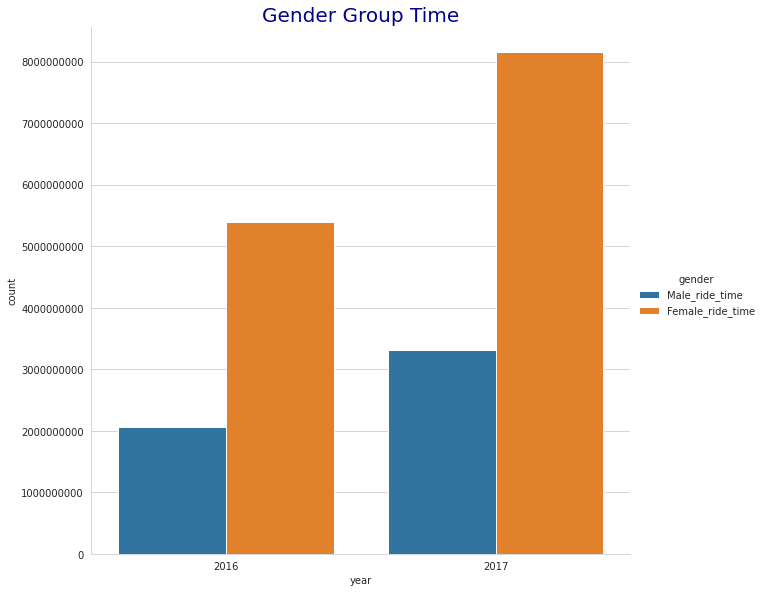

In [ ]:
sns.set_style('whitegrid')
sns.catplot(data=df2,x='year',y='count',hue='gender',kind='bar',size=8)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('Gender Group Time', fontsize=20, color='DarkBlue', fontname='Console')
plt.show()

**UserType Trend**

---
The number of subscribers increased with a huge growth margin.


In [ ]:
query = """SELECT EXTRACT(year
  FROM
    starttime) AS year,
    COUNT(CASE
      WHEN usertype='Subscriber' THEN tripduration
  END
    ) AS Subscriber,
    COUNT(CASE
      WHEN usertype='Customer' THEN tripduration
  END
    ) AS Customer,
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
  WHERE 
    starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
GROUP BY
  year
HAVING 
  year is NOT NULL
ORDER BY
  year DESC;
        """
subscriber_growth_per_year = nyc.query_to_pandas(query)
subscriber_growth_per_year

,year,Subscriber,Customer
0,2017,12441929,1676697
1,2016,9026384,1236265


In [ ]:
df3= pd.melt(subscriber_growth_per_year,id_vars='year',var_name='usertype',value_name='count')
print(df3)

   year    usertype     count
0  2017  Subscriber  12441929
1  2016  Subscriber   9026384
2  2017    Customer   1676697
3  2016    Customer   1236265


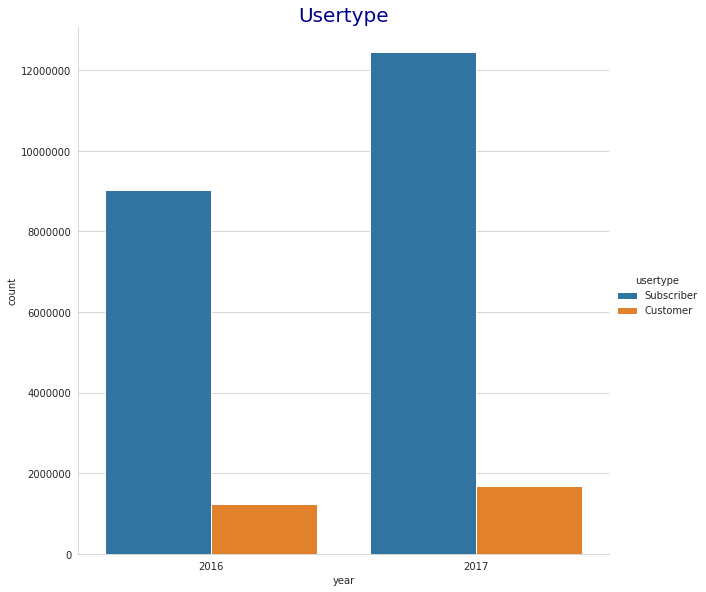

In [ ]:
sns.set_style('whitegrid')
sns.catplot(data=df3,x='year',y='count',hue='usertype',kind='bar',size=8)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('Usertype', fontsize=20, color='DarkBlue', fontname='Console')
plt.show()

## **Bike Stations And Trip Data Analysis**

**Top 10 Most Popular Start Stations**

---
Pershing Square North is the most popular start station with the most number of trips between 2016 and 2017


In [ ]:
query = """SELECT
  start_station_name AS name,
  start_station_latitude AS lan,
  start_station_longitude AS lon,
  COUNT(*) AS num
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE
  start_station_latitude IS NOT NULL
  AND start_station_latitude!=0
  AND start_station_longitude IS NOT NULL
  AND start_station_latitude!=0
  AND starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
GROUP BY
  name,
  lan,
  lon
ORDER BY
  num DESC
LIMIT 10;
        """
most_popular_start_stations = nyc.query_to_pandas(query)
most_popular_start_stations

,name,lan,lon,num
0,Pershing Square North,40.751873,-73.977706,247798
1,West St & Chambers St,40.717548,-74.013221,173585
2,E 17 St & Broadway,40.737050,-73.990093,171454
3,W 21 St & 6 Ave,40.741740,-73.994156,167069
4,Broadway & E 22 St,40.740343,-73.989551,166948
5,8 Ave & W 33 St,40.751551,-73.993934,143844
6,12 Ave & W 40 St,40.760875,-74.002777,142770
7,W 20 St & 11 Ave,40.746745,-74.007756,141493
8,Broadway & E 14 St,40.734546,-73.990741,131412
9,Carmine St & 6 Ave,40.730386,-74.002150,131369


**Top 10 Most Popular End Stations**

---
Pershing Square North is the most popular start station with the most number of trips between 2016 and 2017


In [ ]:
query = """SELECT
  end_station_name AS name,
  end_station_latitude AS lan,
  end_station_longitude AS lon,
  COUNT(*) AS num
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE
  end_station_latitude IS NOT NULL
  AND end_station_latitude!=0
  AND end_station_longitude IS NOT NULL
  AND end_station_latitude!=0
  AND starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
GROUP BY
  name,
  lan,
  lon
ORDER BY
  num DESC
LIMIT 10;
        """
most_popular_end_stations = nyc.query_to_pandas(query)
most_popular_end_stations

,name,lan,lon,num
0,Pershing Square North,40.751873,-73.977706,243223
1,West St & Chambers St,40.717548,-74.013221,183436
2,E 17 St & Broadway,40.737050,-73.990093,177088
3,Broadway & E 22 St,40.740343,-73.989551,175061
4,W 21 St & 6 Ave,40.741740,-73.994156,168672
5,W 20 St & 11 Ave,40.746745,-74.007756,148703
6,12 Ave & W 40 St,40.760875,-74.002777,147754
7,8 Ave & W 33 St,40.751551,-73.993934,139474
8,Carmine St & 6 Ave,40.730386,-74.002150,133427
9,Broadway & E 14 St,40.734546,-73.990741,132010


**Least 10 Popular Start Stations**

---
Crown St & Bedford Ave is the least popular start station between 2016 and 2017


In [ ]:
query = """SELECT
  start_station_name AS name,
  start_station_latitude AS lan,
  start_station_longitude AS lon,
  COUNT(*) AS num
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE
  start_station_latitude IS NOT NULL
  AND start_station_latitude!=0
  AND start_station_longitude IS NOT NULL
  AND start_station_latitude!=0
  AND starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
GROUP BY
  name,
  lan,
  lon
ORDER BY
  num ASC
LIMIT 10;
        """
least_popular_start_stations = nyc.query_to_pandas(query)
least_popular_start_stations

,name,lan,lon,num
0,Crown St & Bedford Ave,40.666563,-73.956741,1
1,Morningside Dr & Amsterdam Ave,40.810285,-73.957365,1
2,2 Ave & E 105 St,40.789817,-73.942961,1
3,Washington Square E,40.730494,-73.995721,2
4,Expansion Tech Station,40.669802,-73.994905,2
5,NYCBS Depot - FAR,40.751483,-73.996764,3
6,NYCBS DEPOT - DELANCEY,40.716444,-73.982331,4
7,NYCBS Depot BAL - DYR,40.759030,-73.993859,5
8,Gowanus Tech Station,40.669802,-73.994905,7
9,Kiosk in a box Deployment,40.708611,-73.928504,7


**Least 10 Popular End Stations**

---
NYCBS Depot - GOW Annex is the least end popular station between 2016 and 2017


In [ ]:
query = """SELECT
  end_station_name AS name,
  end_station_latitude AS lan,
  end_station_longitude AS lon,
  COUNT(*) AS num
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE
  end_station_latitude IS NOT NULL
  AND end_station_latitude!=0
  AND end_station_longitude IS NOT NULL
  AND end_station_latitude!=0
  AND starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
GROUP BY
  name,
  lan,
  lon
ORDER BY
  num ASC
LIMIT 10;
        """
least_popular_end_stations = nyc.query_to_pandas(query)
least_popular_end_stations

,name,lan,lon,num
0,NYCBS Depot - GOW Annex,40.668884,-73.994814,1
1,Heights Elevator,40.748536,-74.040313,1
2,Grove St PATH,40.719461,-74.042943,1
3,Astor Place,40.719282,-74.071262,1
4,Hilltop,40.731169,-74.057574,1
5,Pathmark Depot,40.672333,-73.997061,1
6,Union St,40.718211,-74.083639,1
7,Brunswick St,40.724176,-74.050656,1
8,Lafayette Park,40.713464,-74.062859,1
9,Monmouth and 6th,40.725685,-74.048790,1


**10 Most Popular Stations**

---
Pershing Square North is the most popular station with the highest number of start and end trip between 2016 and 2017


In [ ]:
query = """SELECT
  station,
  COUNT(*) AS num
  FROM((SELECT start_station_name AS station 
        FROM
          `bigquery-public-data.new_york_citibike.citibike_trips`
        WHERE
          starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00') UNION ALL
       (SELECT end_station_name AS station 
         FROM
           `bigquery-public-data.new_york_citibike.citibike_trips`
         WHERE
           starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00')) num
GROUP BY
  station
ORDER BY
  num DESC
LIMIT 10;
        """
most_popular_stations = nyc.query_to_pandas(query)

most_popular_stations

,station,num
0,Pershing Square North,491021
1,West St & Chambers St,357021
2,E 17 St & Broadway,348542
3,Broadway & E 22 St,342009
4,W 21 St & 6 Ave,335741
5,12 Ave & W 40 St,290524
6,W 20 St & 11 Ave,290196
7,8 Ave & W 33 St,283318
8,Carmine St & 6 Ave,264796
9,Broadway & E 14 St,263422


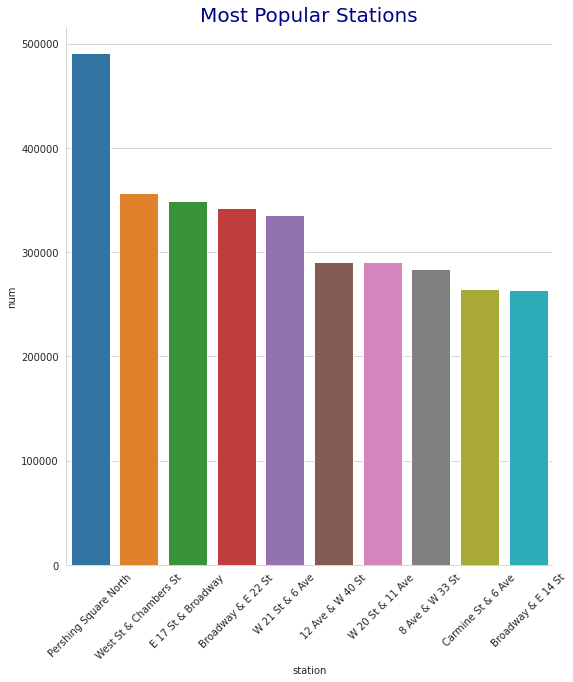

In [ ]:
sns.set_style('whitegrid')
sns.catplot(data=most_popular_stations,x='station',y='num',kind='bar',size=8)
plt.xticks(rotation=45)
plt.title('Most Popular Stations', fontsize=20, color='DarkBlue', fontname='Console')
plt.show()

**10 Least Popular Stations**

---
Jersey & 3rd tops the list of the least popular stations with just 1 start or end trip between 2016 and 2017


In [ ]:
query = """SELECT
  station,
  COUNT(*) AS num
  FROM((SELECT start_station_name AS station 
        FROM
          `bigquery-public-data.new_york_citibike.citibike_trips`
        WHERE
          starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00') UNION ALL
       (SELECT end_station_name AS station 
         FROM
           `bigquery-public-data.new_york_citibike.citibike_trips`
         WHERE
           starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00')) num
GROUP BY
  station
ORDER BY
  num ASC
LIMIT 10;
        """
least_popular_stations = nyc.query_to_pandas(query)
least_popular_stations

,station,num
0,Jersey & 3rd,1
1,NJCU,1
2,Brunswick St,1
3,Astor Place,1
4,NYCBS Depot - GOW Annex,1
5,Pathmark Depot,1
6,Lafayette Park,1
7,Hilltop,1
8,Monmouth and 6th,1
9,Union St,1


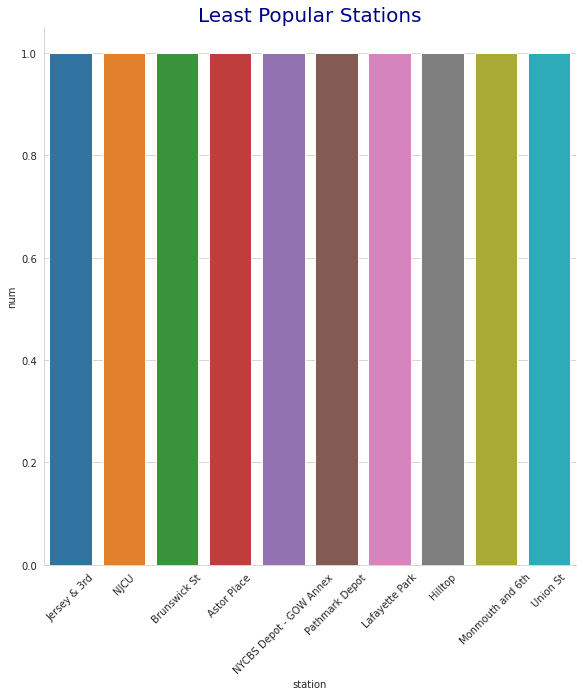

In [ ]:
sns.set_style('whitegrid')
sns.catplot(data=least_popular_stations,x='station',y='num',kind='bar',size=8)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks(rotation=45)
plt.title('Least Popular Stations', fontsize=20, color='DarkBlue', fontname='Console')
plt.show()

**Most Popular Trips**

---
Central Park S & 6 Ave to Central Park S & 6 Ave is the most popular bike trip made between 2016 and 2017


In [ ]:
query = """SELECT
  CONCAT(start_station_name, ' to ', end_station_name) AS stations,
  COUNT(*) AS num
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE
  starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
GROUP BY
  stations
ORDER BY
  num DESC
LIMIT 10;
        """
most_popular_trips = nyc.query_to_pandas(query)
most_popular_trips

,stations,num
0,Central Park S & 6 Ave to Central Park S & 6 Ave,15116
1,12 Ave & W 40 St to West St & Chambers St,9106
2,Grand Army Plaza & Central Park S to Grand Arm...,8322
3,Centre St & Chambers St to Centre St & Chamber...,8278
4,Central Park S & 6 Ave to 5 Ave & E 78 St,8028
5,Central Park S & 6 Ave to 5 Ave & E 88 St,7756
6,W 21 St & 6 Ave to 9 Ave & W 22 St,7318
7,West St & Chambers St to 12 Ave & W 40 St,7176
8,Soissons Landing to Yankee Ferry Terminal,6995
9,Yankee Ferry Terminal to Soissons Landing,6975


**Usage by Day and Hour**

---
According to the analysis, we can deduce that the least disruptive time to redistribute bikes would be 3 - 4 am on weekdays and 4-5 am on weekends (week starts on Sunday). If redistribution is necessary in the middle of the day, 10 - 11 am is optimal for weekdays, while there is no clear local minima for the weekends. However, there is likely some variance to this optimal redistribution time. It is likely that these times vary with other conditions (e.g. temperature, holidays, etc).


In [ ]:
query = """SELECT EXTRACT(HOUR FROM starttime) Hour, EXTRACT(DAYOFWEEK FROM starttime) Day_Of_Week, COUNT(*) Number_Of_Trips
FROM `bigquery-public-data.new_york.citibike_trips`
WHERE start_station_id IS NOT NULL
  AND birth_year IS NOT NULL
  AND end_station_longitude != 0
  AND starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
GROUP BY Hour, Day_Of_Week;
        """
week_hour_usage = nyc.query_to_pandas(query)
week_hour_usage

,Hour,Day_Of_Week,Number_Of_Trips
0,8,4,167364
1,6,4,45792
2,7,5,92139
3,9,6,102161
4,10,5,59531
...,...,...,...
163,2,1,6973
164,7,1,10129
165,23,1,14294
166,4,4,2215


In [ ]:
import altair as alt

alt.Chart(week_hour_usage).mark_line(
).encode(
    x=alt.X('Hour:Q', axis = alt.Axis(values = [n for n in range(24)])),
    y=alt.Y('Number_Of_Trips:Q'),
    tooltip=['Day_Of_Week', "Number_Of_Trips"],
    color = alt.Color("Day_Of_Week:T", scale=alt.Scale(range=["orange", "green","violet"]))
).properties(
    title="Citi Bike Usage By Day And Hour",
    width=1000
)

alt.Chart(...)

In [ ]:
query = """SELECT COUNT(*) Number_Of_Trips
     , FORMAT_TIMESTAMP("%Y-%m", starttime) as Year_Month
     , usertype
FROM `bigquery-public-data.new_york.citibike_trips`
WHERE start_station_id IS NOT NULL
  AND birth_year IS NOT NULL
  AND end_station_longitude != 0
  AND starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
GROUP BY Year_Month, usertype;
        """
popularity_time = nyc.query_to_pandas(query)
popularity_time

,Number_Of_Trips,Year_Month,usertype
0,1265110,2016-06,Subscriber
1,19447,2016-09,Customer
2,1413891,2016-09,Subscriber
3,1331826,2016-08,Subscriber
4,1173897,2016-07,Subscriber
5,484932,2016-01,Subscriber
6,11212,2016-08,Customer
7,2614,2016-07,Customer
8,531045,2016-02,Subscriber
9,1035946,2016-05,Subscriber


In [ ]:
import altair as alt

alt.Chart(popularity_time).mark_line(
).encode(
    x=alt.X('Year_Month:N'),
    y=alt.Y('Number_Of_Trips:Q'),
    color = "usertype",
    tooltip = ["Number_Of_Trips", "usertype", "Year_Month"]
).properties(
    title="Citi Bike Usage By Month and Year"
) + alt.Chart(popularity_time).mark_circle(
).encode(
    x=alt.X('Year_Month:N'),
    y=alt.Y('Number_Of_Trips:Q'),
    color = "usertype",
    tooltip = ["Number_Of_Trips", "usertype", "Year_Month"]
).properties(
    title="Citi Bike Usage By Month and Year"
)

alt.LayerChart(...)

**Usage by time of the Day**

---
There's more usage by afternoon and less by midnight, so redistribution of bikes by midnight wouldbe optimal.


In [ ]:
query = """SELECT
CASE 
  WHEN EXTRACT(hour FROM starttime) BETWEEN 6 and 11 THEN "morning"
  WHEN EXTRACT(hour FROM starttime) BETWEEN 12 and 18 THEN "afternoon"
  WHEN EXTRACT(hour FROM starttime) BETWEEN 19 and 23 THEN "night"
  WHEN EXTRACT(hour FROM starttime) BETWEEN 0 and 5 THEN "midnight"
  END
as time_of_day,
COUNT(*) Number_Of_Trips
FROM `bigquery-public-data.new_york.citibike_trips`
WHERE starttime >= '2016-01-01T00:00:00' AND stoptime < '2018-01-01T00:00:00'
GROUP BY time_of_day;
        """
popularity_time = nyc.query_to_pandas(query)
popularity_time

,time_of_day,Number_Of_Trips
0,afternoon,5056063
1,midnight,266629
2,night,1866937
3,morning,3073020


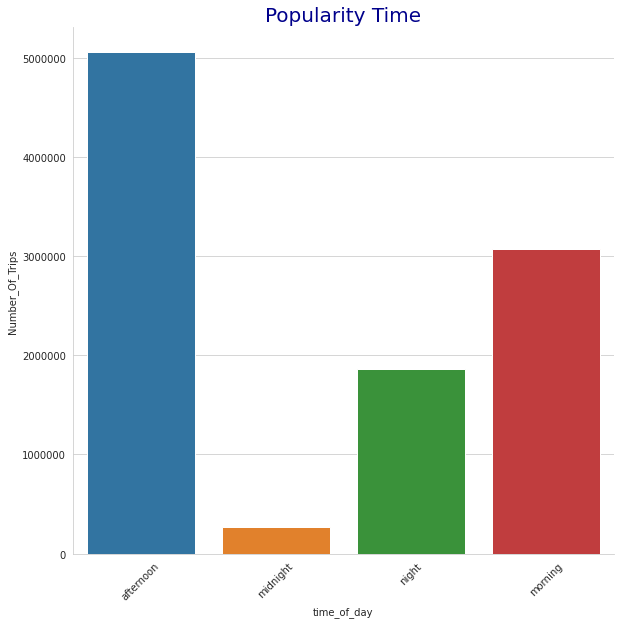

In [ ]:
sns.set_style('whitegrid')
sns.catplot(data=popularity_time,x='time_of_day',y='Number_Of_Trips',kind='bar',size=8)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks(rotation=45)
plt.title('Popularity Time', fontsize=20, color='DarkBlue', fontname='Console')
plt.show()

# **Solution**

---
From the analysis, we the following assumptions can deduced as ways to cut down costs/expenses and improve the revenue of Alta Bicycle Share:


*   Reduce bike redistribution to stations with the least number of trips
*   Optionally, close down on stations with very low trips within the year
*   Redistribution of bikes should be done more at midnight to stations with high volume of trips.





